In [1]:
import requests
import pandas as pd
import geopy.distance
from geopy.geocoders import Nominatim
import time

In [2]:
import pandas as pd
import os

# File paths
file_paths = [
    '/Users/saiveerendranath/Documents/Final_Sem_Project/files/osm_data_with_addresses_01_to_1265_V02.csv',
    '/Users/saiveerendranath/Documents/Final_Sem_Project/files/osm_data_with_addresses_1265_to_2190_V02.csv',
    '/Users/saiveerendranath/Documents/Final_Sem_Project/files/osm_data_with_addresses_2190_to_3089_v02.csv',
    '/Users/saiveerendranath/Documents/Final_Sem_Project/files/osm_data_with_addresses_3089_to_3185_v02.csv',
    '/Users/saiveerendranath/Documents/Final_Sem_Project/files/osm_data_with_addresses_3185_to_3286_v02.csv',
    '/Users/saiveerendranath/Documents/Final_Sem_Project/files/osm_data_with_addresses_3836_to_5228.csv',
    '/Users/saiveerendranath/Documents/Final_Sem_Project/files/osm_data_with_addresses_5228_to_5709_v02.csv',
    '/Users/saiveerendranath/Documents/Final_Sem_Project/files/osm_data_with_addresses_5709_to_6324_v02.csv',
    '/Users/saiveerendranath/Documents/Final_Sem_Project/files/osm_data_with_addresses_6324_to_.csv'
]

# Read and concatenate
df = pd.concat([pd.read_csv(file) for file in file_paths], ignore_index=True)


In [3]:
df.shape

(6715, 15)

In [4]:
df.head()

,Address,Latitude,Longitude,TspNum,TspDst,AtrNum,AtrDst,EdcNum,EdcDst,HthNum,HthDst,RstNum,RstDst,RtlNum,RtlDst
0,9327 N SWAN RD,32.259685,-110.892535,27422,6646.550215,151,6186.873607,13,4750.938579,4,5044.844664,119,6822.354356,292,7082.895521
1,9411 W COUNTY LINE RD,43.191907,-88.028056,8597,7278.698268,59,7464.160390,24,6779.871781,1,5568.951667,31,7935.282339,175,7738.078903
2,9322 N JOYCE AV,43.186555,-88.017481,10505,7259.967247,62,6930.511743,24,6699.479533,1,4673.351796,33,8143.825683,194,7675.648721
3,9360 N 85TH ST,43.187954,-88.015581,10217,7273.215906,63,6929.617437,23,6628.235133,1,4522.942771,32,8093.925612,188,7662.976584
4,9305 N BURBANK AV,43.187111,-88.015005,10452,7261.488521,64,6926.658147,24,6747.941480,1,4473.037706,33,8159.046176,192,7668.564200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6715 entries, 0 to 6714
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Address    6715 non-null   object 
 1   Latitude   6715 non-null   float64
 2   Longitude  6715 non-null   float64
 3   TspNum     6715 non-null   int64  
 4   TspDst     6715 non-null   float64
 5   AtrNum     6715 non-null   int64  
 6   AtrDst     6715 non-null   float64
 7   EdcNum     6715 non-null   int64  
 8   EdcDst     6715 non-null   float64
 9   HthNum     6715 non-null   int64  
 10  HthDst     6715 non-null   float64
 11  RstNum     6715 non-null   int64  
 12  RstDst     6715 non-null   float64
 13  RtlNum     6715 non-null   int64  
 14  RtlDst     6715 non-null   float64
dtypes: float64(8), int64(6), object(1)
memory usage: 787.0+ KB


In [6]:
# prompt: read df2 from /content/armslengthsales_2022_valid_20230404 (1).csv

df2 = pd.read_csv("/Users/saiveerendranath/Documents/Final_Sem_Project/files/armslengthsales_2022_valid_20230404.csv")


In [7]:
df2_residential = df2[df2["PropType"] == "Residential"].copy()

In [8]:
df2.columns

Index(['PropertyID', 'PropType', 'taxkey', 'Address', 'CondoProject',
       'District', 'nbhd', 'Style', 'Extwall', 'Stories', 'Year_Built',
       'Rooms', 'FinishedSqft', 'Units', 'Bdrms', 'Fbath', 'Hbath', 'Lotsize',
       'Sale_date', 'Sale_price'],
      dtype='object')

In [9]:
df2.isnull().sum()

PropertyID         0
PropType           0
taxkey             0
Address            0
CondoProject    6261
District           0
nbhd               0
Style             21
Extwall          926
Stories           39
Year_Built        11
Rooms            443
FinishedSqft      24
Units              0
Bdrms            443
Fbath              0
Hbath              0
Lotsize            0
Sale_date          0
Sale_price         0
dtype: int64

In [10]:
df2_residential.shape

(5774, 20)

In [11]:
# Copy the DataFrame
df_clean = df2_residential.copy()

# Categorical columns: fill with mode
categorical_cols = ["Style", "Extwall"]
for col in categorical_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

# Numeric columns to fill with median
median_cols = ["Stories", "Year_Built", "Rooms", "Bdrms"]
for col in median_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Numeric columns to fill with mean
mean_cols = ["FinishedSqft"]
for col in mean_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mean())

# Final null check
print("✅ Nulls after cleaning:")
df_clean.isnull().sum()

✅ Nulls after cleaning:


PropertyID         0
PropType           0
taxkey             0
Address            0
CondoProject    5774
District           0
nbhd               0
Style              0
Extwall            0
Stories            0
Year_Built         0
Rooms              0
FinishedSqft       0
Units              0
Bdrms              0
Fbath              0
Hbath              0
Lotsize            0
Sale_date          0
Sale_price         0
dtype: int64

In [12]:
combined_df = pd.merge(df, df_clean, on="Address", how="inner")

In [13]:
combined_df.isna().sum()

Address            0
Latitude           0
Longitude          0
TspNum             0
TspDst             0
AtrNum             0
AtrDst             0
EdcNum             0
EdcDst             0
HthNum             0
HthDst             0
RstNum             0
RstDst             0
RtlNum             0
RtlDst             0
PropertyID         0
PropType           0
taxkey             0
CondoProject    6005
District           0
nbhd               0
Style              0
Extwall            0
Stories            0
Year_Built         0
Rooms              0
FinishedSqft       0
Units              0
Bdrms              0
Fbath              0
Hbath              0
Lotsize            0
Sale_date          0
Sale_price         0
dtype: int64

In [14]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6005 entries, 0 to 6004
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Address       6005 non-null   object 
 1   Latitude      6005 non-null   float64
 2   Longitude     6005 non-null   float64
 3   TspNum        6005 non-null   int64  
 4   TspDst        6005 non-null   float64
 5   AtrNum        6005 non-null   int64  
 6   AtrDst        6005 non-null   float64
 7   EdcNum        6005 non-null   int64  
 8   EdcDst        6005 non-null   float64
 9   HthNum        6005 non-null   int64  
 10  HthDst        6005 non-null   float64
 11  RstNum        6005 non-null   int64  
 12  RstDst        6005 non-null   float64
 13  RtlNum        6005 non-null   int64  
 14  RtlDst        6005 non-null   float64
 15  PropertyID    6005 non-null   int64  
 16  PropType      6005 non-null   object 
 17  taxkey        6005 non-null   int64  
 18  CondoProject  0 non-null    

In [15]:
combined_df['nbhd'].unique()

array([  40,  240,  440,  360,  380,  820,  480,  520,  560,  600,  660,
        800,  780,   50,  700,  960,  900, 1200,  980, 1020, 1040, 1400,
       1380, 1140, 1160, 1220, 1340, 1440, 1150, 1480, 1460, 1470, 1490,
       1560, 1680, 1500, 1620, 2100, 2040, 1940, 1830, 1820, 1840, 1740,
       2840, 2860, 2820, 2900, 3060, 3160, 3320, 3150, 2880, 2850, 2870,
       2960, 2950, 1780, 1850, 2080, 2120, 2140, 1980, 1870, 1860, 2510,
       2540, 2600, 2580, 2520, 2380, 2400, 2420, 3000, 2970, 2910, 2890,
       2920, 3240, 3190, 3170, 3040, 2300, 2610, 2660, 2180, 2160, 2680,
       2700, 2720, 2710, 2760, 4060, 4020, 4040, 4050, 4000, 4100, 4120,
       4510, 4240, 4280, 4260, 4320, 4160, 4910, 4540, 4500, 4560, 4610,
       4600, 4580, 4180, 4400, 4350, 4340, 4310, 4380, 4420, 4410, 4360,
       4520, 4620, 4700, 4425, 4330, 4430, 4660, 4740, 4720, 4800, 4780,
       4840, 4860, 4920])

In [16]:
combined_df.head()

,Address,Latitude,Longitude,TspNum,TspDst,AtrNum,AtrDst,EdcNum,EdcDst,HthNum,...,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
0,9327 N SWAN RD,32.259685,-110.892535,27422,6646.550215,151,6186.873607,13,4750.938579,4,...,1945.0,7.0,1571.58074,0,4.0,0,0,1341648,2022-01-07,800000.0
1,9411 W COUNTY LINE RD,43.191907,-88.028056,8597,7278.698268,59,7464.160390,24,6779.871781,1,...,1959.0,6.0,1334.00000,1,3.0,1,1,83200,2022-08-09,280000.0
2,9322 N JOYCE AV,43.186555,-88.017481,10505,7259.967247,62,6930.511743,24,6699.479533,1,...,1980.0,10.0,1006.00000,1,6.0,1,0,8303,2022-05-23,233100.0
3,9360 N 85TH ST,43.187954,-88.015581,10217,7273.215906,63,6929.617437,23,6628.235133,1,...,1982.0,5.0,1007.00000,1,3.0,1,0,7200,2022-07-25,215000.0
4,9305 N BURBANK AV,43.187111,-88.015005,10452,7261.488521,64,6926.658147,24,6747.941480,1,...,1984.0,5.0,1301.00000,1,3.0,2,0,7200,2022-03-29,150000.0


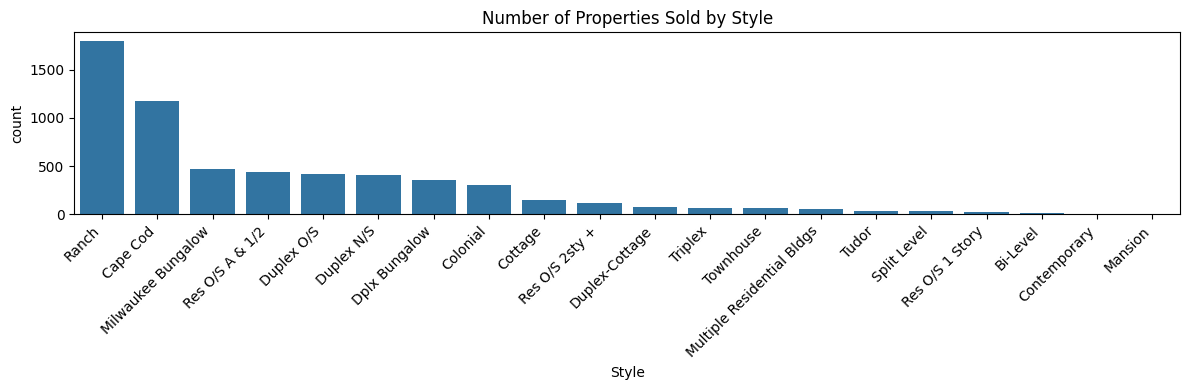

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
sns.countplot(data=combined_df, x='Style', order=combined_df['Style'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title("Number of Properties Sold by Style")
plt.tight_layout()
plt.show()


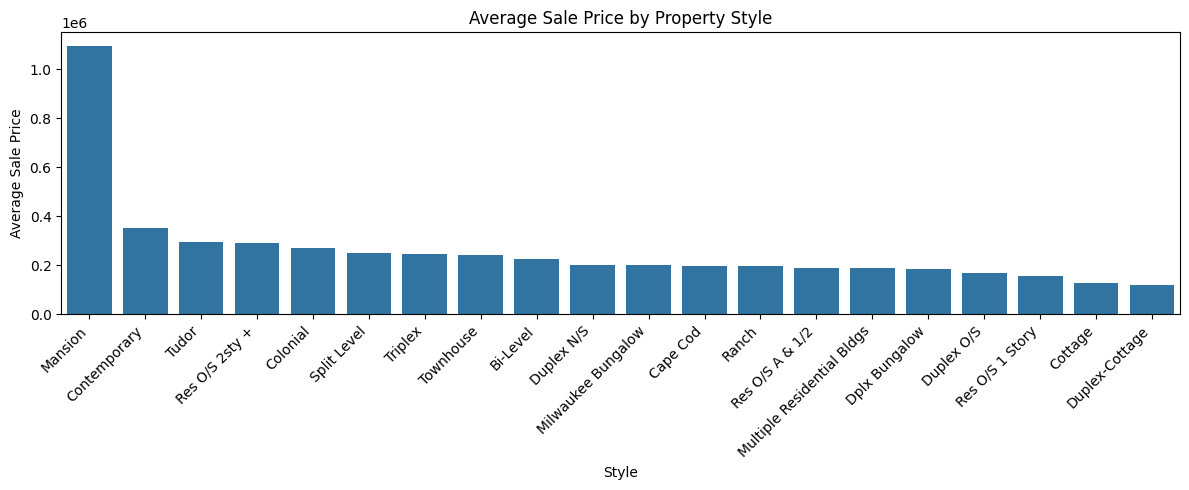

In [18]:
avg_price_by_style = combined_df.groupby('Style')['Sale_price'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(x=avg_price_by_style.index, y=avg_price_by_style.values)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Average Sale Price")
plt.title("Average Sale Price by Property Style")
plt.tight_layout()
plt.show()


/var/folders/y2/k7fcyjtj0nq71zg3bv8k7jl00000gn/T/ipykernel_74174/1309660542.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_infra_by_style.index, y=avg_infra_by_style.values, palette='viridis')
/var/folders/y2/k7fcyjtj0nq71zg3bv8k7jl00000gn/T/ipykernel_74174/1309660542.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_infra_by_style.index, y=avg_infra_by_style.values, palette='viridis')
/var/folders/y2/k7fcyjtj0nq71zg3bv8k7jl00000gn/T/ipykernel_74174/1309660542.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_in

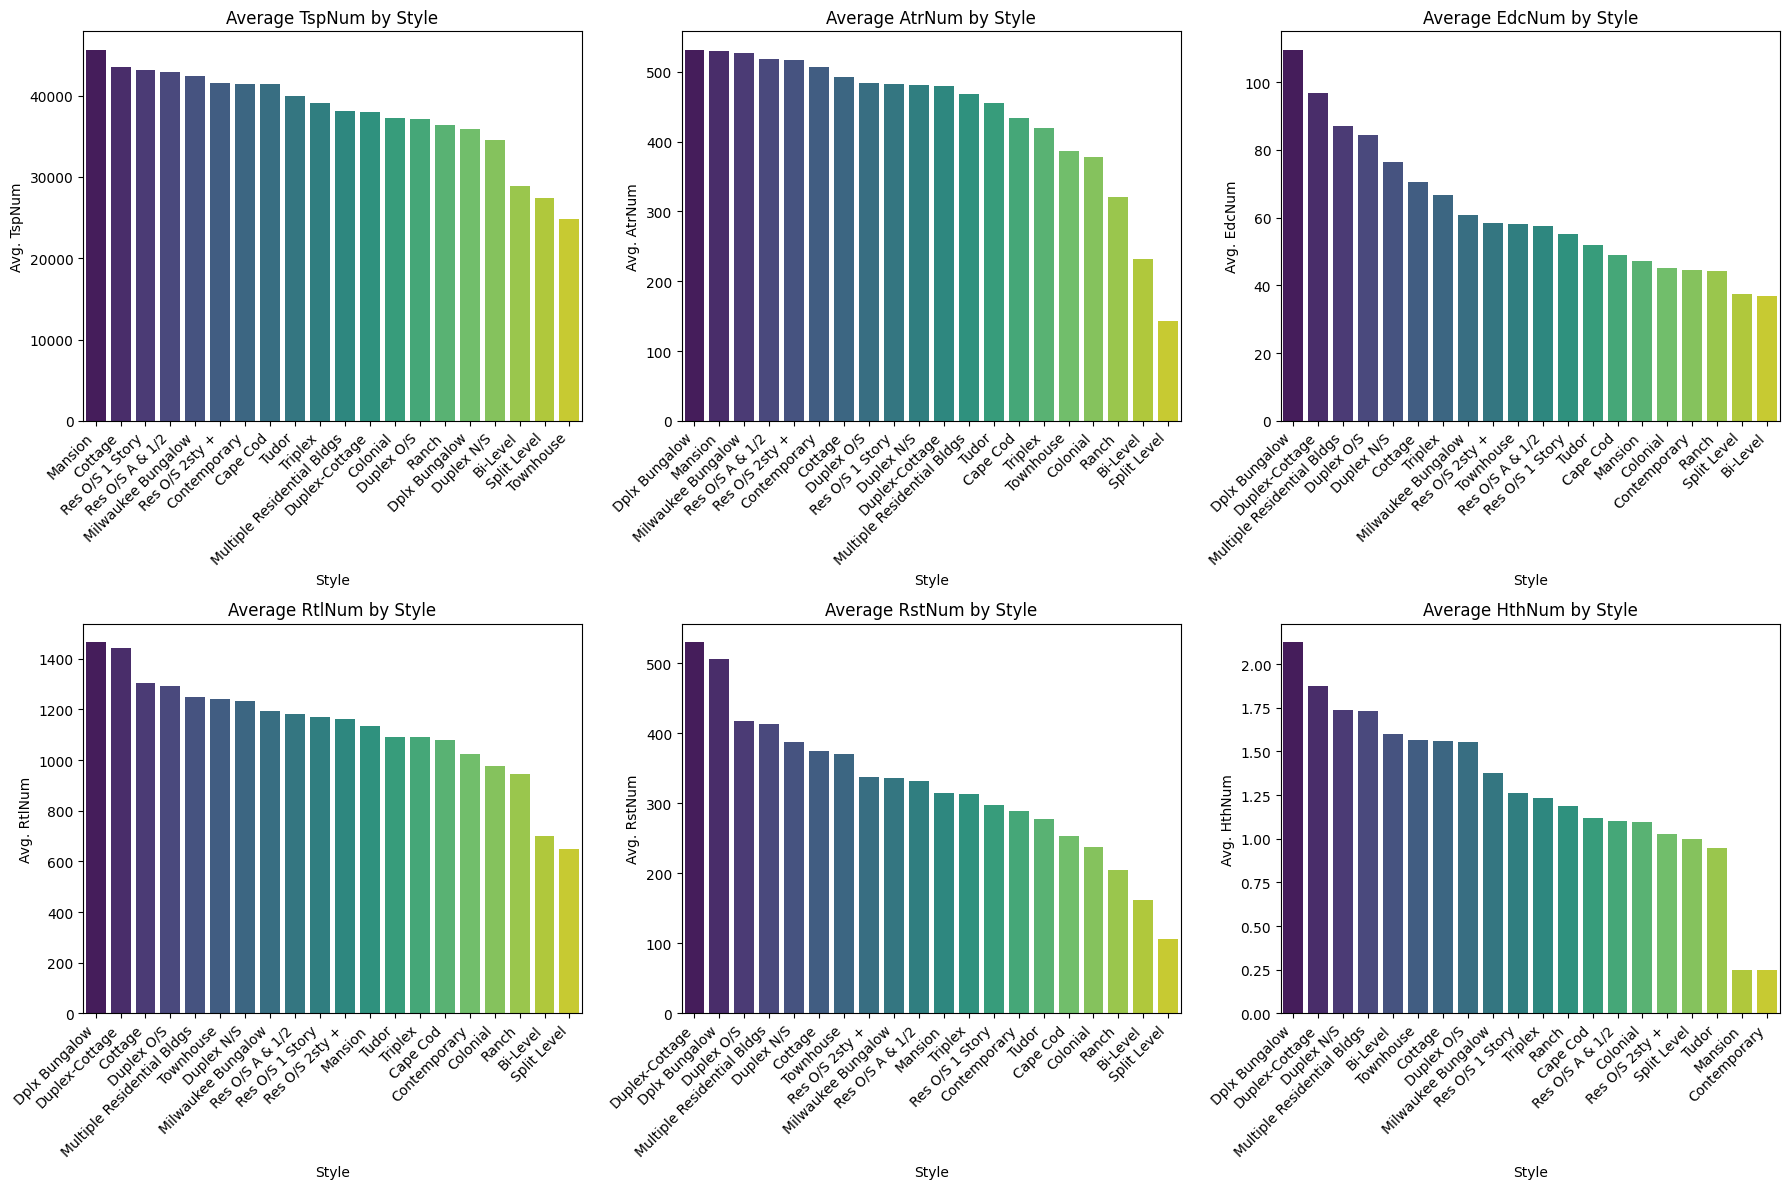

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of infra columns to analyze
infra_cols = ['TspNum', 'AtrNum', 'EdcNum', 'RtlNum', 'RstNum', 'HthNum']

# Set up plot
plt.figure(figsize=(18, 12))

# Loop through each column and plot
for idx, col in enumerate(infra_cols, 1):
    plt.subplot(2, 3, idx)
    avg_infra_by_style = combined_df.groupby('Style')[col].mean().sort_values(ascending=False)
    
    sns.barplot(x=avg_infra_by_style.index, y=avg_infra_by_style.values, palette='viridis')
    plt.title(f'Average {col} by Style')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel(f'Avg. {col}')
    plt.xlabel('Style')

plt.tight_layout()
plt.show()


/var/folders/y2/k7fcyjtj0nq71zg3bv8k7jl00000gn/T/ipykernel_74174/2248076872.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_distance_by_style.index, y=avg_distance_by_style.values, palette='coolwarm')
/var/folders/y2/k7fcyjtj0nq71zg3bv8k7jl00000gn/T/ipykernel_74174/2248076872.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_distance_by_style.index, y=avg_distance_by_style.values, palette='coolwarm')
/var/folders/y2/k7fcyjtj0nq71zg3bv8k7jl00000gn/T/ipykernel_74174/2248076872.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.ba

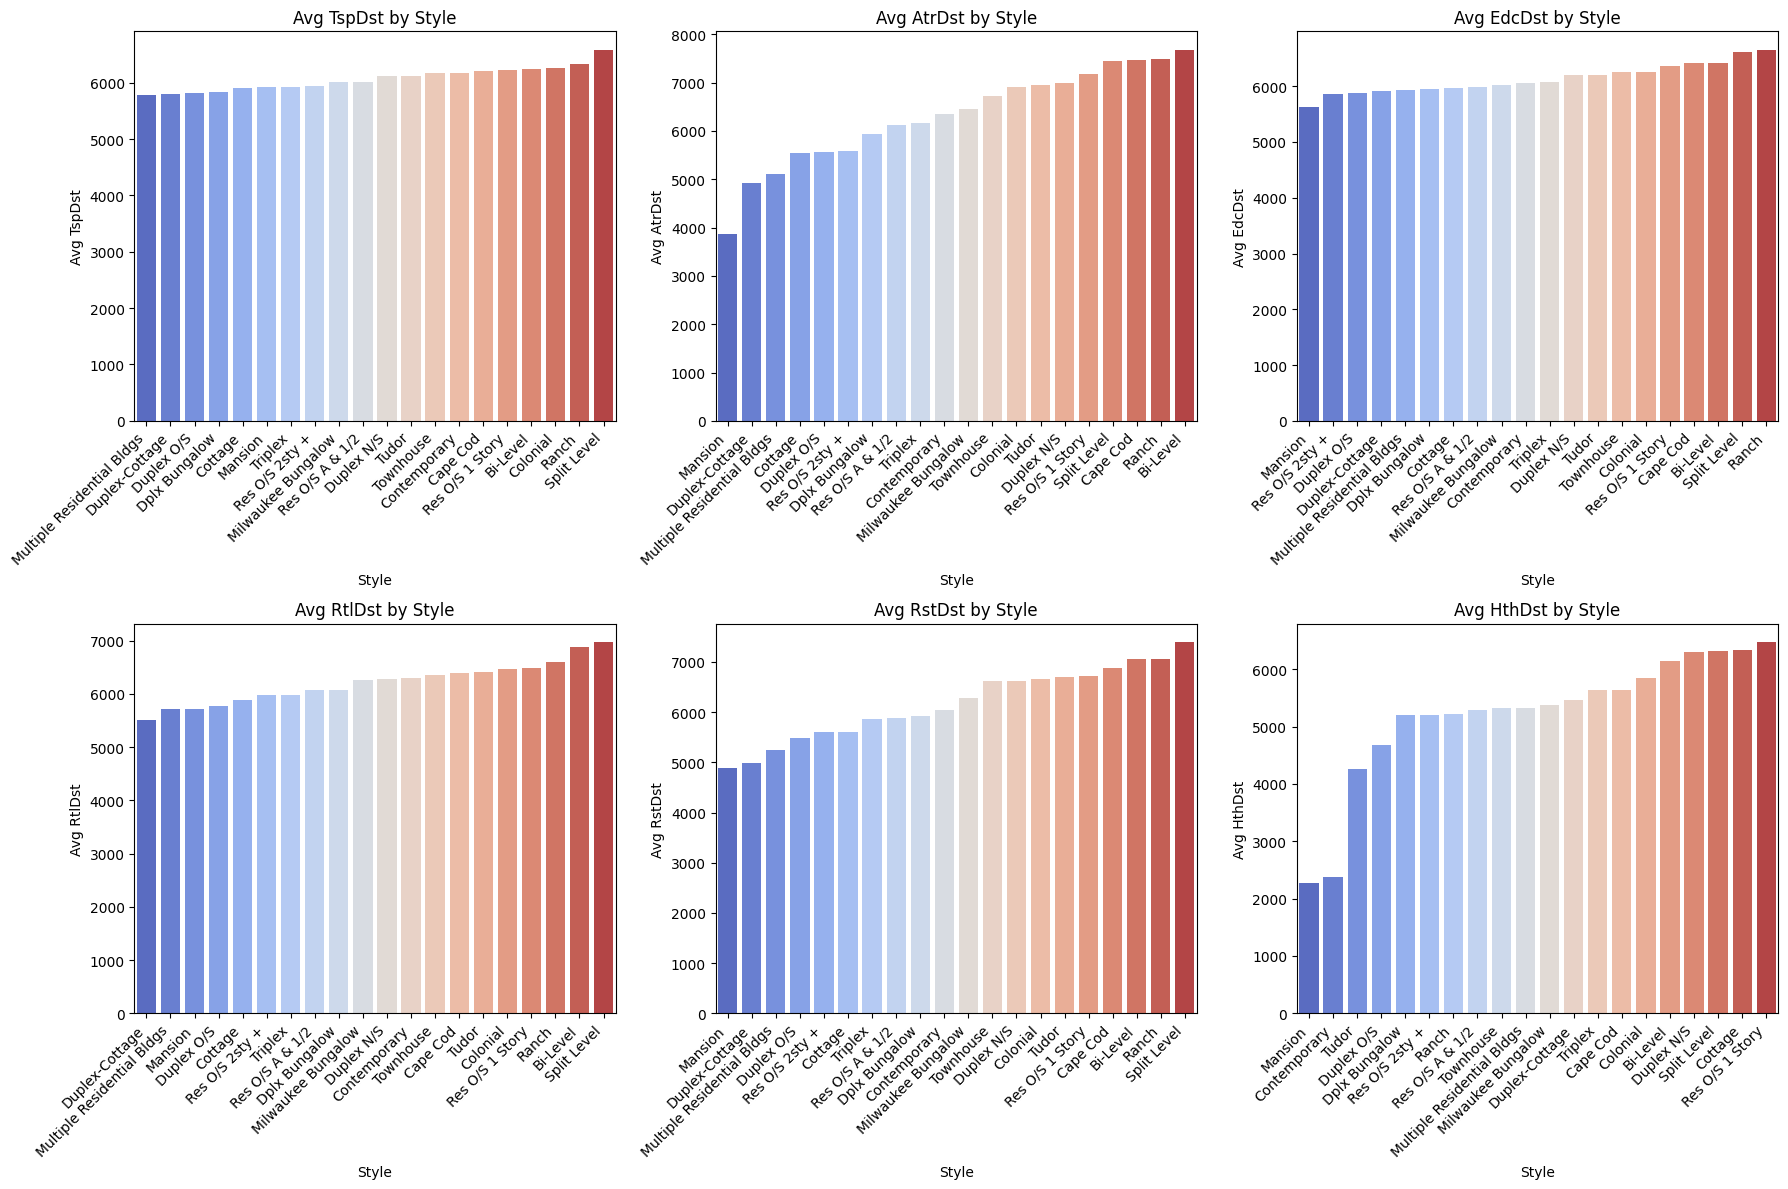

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of distance columns
distance_cols = ['TspDst', 'AtrDst', 'EdcDst', 'RtlDst', 'RstDst', 'HthDst']

# Set up the plot grid
plt.figure(figsize=(18, 12))

# Loop through each distance feature
for idx, col in enumerate(distance_cols, 1):
    plt.subplot(2, 3, idx)
    
    avg_distance_by_style = combined_df.groupby('Style')[col].mean().sort_values()
    
    sns.barplot(x=avg_distance_by_style.index, y=avg_distance_by_style.values, palette='coolwarm')
    plt.title(f'Avg {col} by Style')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel(f'Avg {col}')
    plt.xlabel('Style')

plt.tight_layout()
plt.show()


In [21]:
import pandas as pd

# Define custom price brackets
bins = [0, 100000, 200000, 300000, 400000, 500000, float('inf')]
labels = ['<100K', '100K-200K', '200K-300K', '300K-400K', '400K-500K', '>500K']

combined_df['Price_Range'] = pd.cut(combined_df['Sale_price'], bins=bins, labels=labels)

# Check the distribution
print(combined_df['Price_Range'].value_counts())

Price_Range
100K-200K    2521
200K-300K    2191
<100K         718
300K-400K     458
400K-500K      85
>500K          32
Name: count, dtype: int64


In [22]:
# 1. Infrastructure Density / Accessibility
combined_df['Tsp_Density'] = combined_df['TspNum'] / combined_df['TspDst']
combined_df['Atr_Density'] = combined_df['AtrNum'] / combined_df['AtrDst']
combined_df['Edc_Density'] = combined_df['EdcNum'] / combined_df['EdcDst']
combined_df['Rtl_Density'] = combined_df['RtlNum'] / combined_df['RtlDst']
combined_df['Rst_Density'] = combined_df['RstNum'] / combined_df['RstDst']
combined_df['Hth_Density'] = combined_df['HthNum'] / combined_df['HthDst']

# 2. Weighted Infrastructure Index (uses squared distances)
combined_df['Weighted_Tsp'] = combined_df['TspNum'] / (combined_df['TspDst'] ** 2)
combined_df['Weighted_Atr'] = combined_df['AtrNum'] / (combined_df['AtrDst'] ** 2)
combined_df['Weighted_Edc'] = combined_df['EdcNum'] / (combined_df['EdcDst'] ** 2)
combined_df['Weighted_Rtl'] = combined_df['RtlNum'] / (combined_df['RtlDst'] ** 2)
combined_df['Weighted_Rst'] = combined_df['RstNum'] / (combined_df['RstDst'] ** 2)
combined_df['Weighted_Hth'] = combined_df['HthNum'] / (combined_df['HthDst'] ** 2)

# 3. Infrastructure Access Score
combined_df['Infra_Access_Score'] = (
    combined_df['TspNum'] + combined_df['AtrNum'] + combined_df['EdcNum'] +
    combined_df['RtlNum'] + combined_df['RstNum'] + combined_df['HthNum']
) / (
    combined_df['TspDst'] + combined_df['AtrDst'] + combined_df['EdcDst'] +
    combined_df['RtlDst'] + combined_df['RstDst'] + combined_df['HthDst']
)

# 4. Proximity to Urban Areas (Transportation + Retail + Restaurants)
combined_df['Urban_Proximity_Score'] = (
    combined_df['TspNum'] + combined_df['RtlNum'] + combined_df['RstNum']
) / (
    combined_df['TspDst'] + combined_df['RtlDst'] + combined_df['RstDst']
)


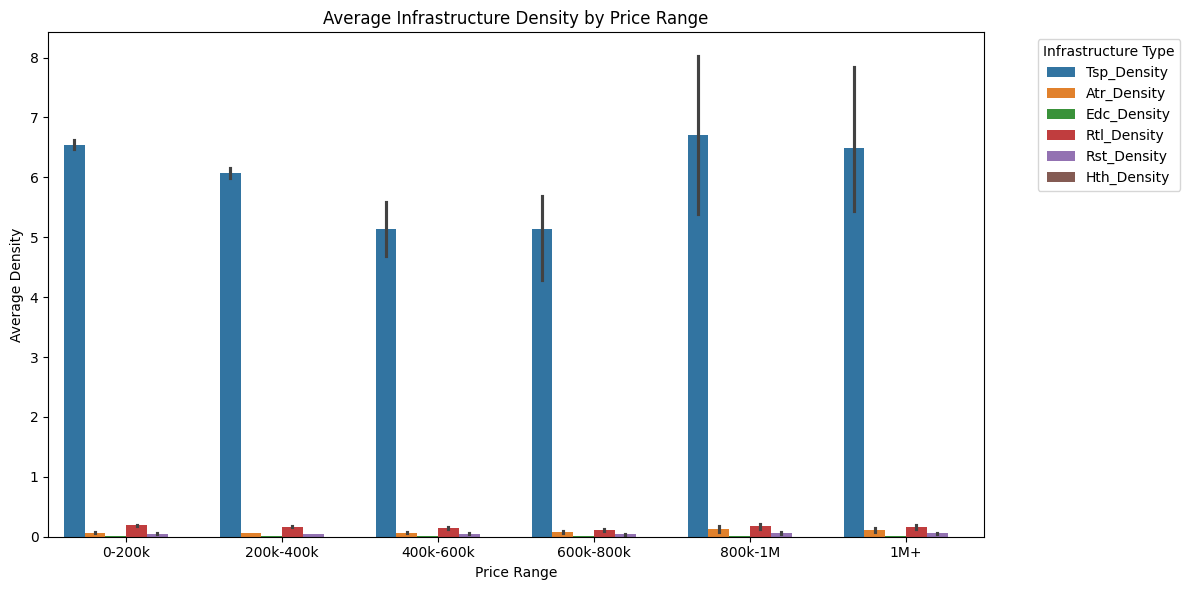

In [23]:
combined_df['Price_Range'] = pd.cut(
    combined_df['Sale_price'],
    bins=[0, 200000, 400000, 600000, 800000, 1000000, float('inf')],
    labels=['0-200k', '200k-400k', '400k-600k', '600k-800k', '800k-1M', '1M+']
)

import seaborn as sns
import matplotlib.pyplot as plt

# Select the density columns
density_cols = ['Tsp_Density', 'Atr_Density', 'Edc_Density', 'Rtl_Density', 'Rst_Density', 'Hth_Density']

# Melt the DataFrame to long format for plotting
melted_df = combined_df.melt(id_vars='Price_Range', value_vars=density_cols, 
                              var_name='Infra_Type', value_name='Density')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='Price_Range', y='Density', hue='Infra_Type')
plt.title('Average Infrastructure Density by Price Range')
plt.ylabel('Average Density')
plt.xlabel('Price Range')
plt.legend(title='Infrastructure Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


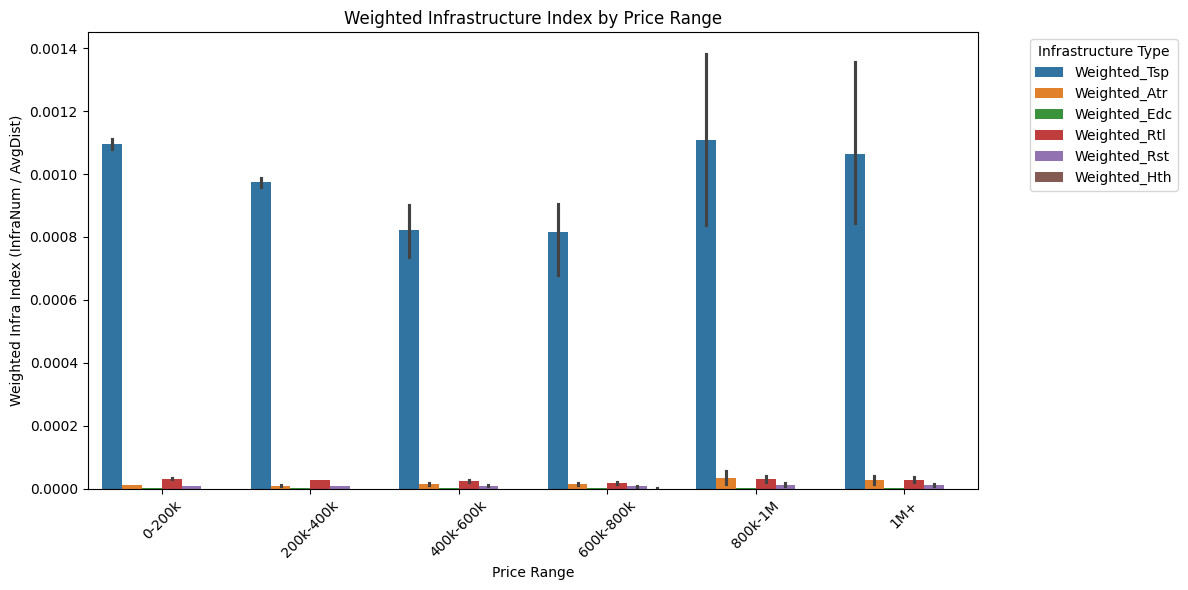

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant weighted columns
weight_cols = [
    'Weighted_Tsp',
    'Weighted_Atr',
    'Weighted_Edc',
    'Weighted_Rtl',
    'Weighted_Rst',
    'Weighted_Hth'
]

# Melt the DataFrame for visualization
melted_weights = combined_df.melt(
    id_vars='Price_Range',
    value_vars=weight_cols,
    var_name='Infrastructure_Type',
    value_name='Weighted_Index'
)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_weights, x='Price_Range', y='Weighted_Index', hue='Infrastructure_Type')
plt.title('Weighted Infrastructure Index by Price Range')
plt.ylabel('Weighted Infra Index (InfraNum / AvgDist)')
plt.xlabel('Price Range')
plt.xticks(rotation=45)
plt.legend(title='Infrastructure Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/var/folders/y2/k7fcyjtj0nq71zg3bv8k7jl00000gn/T/ipykernel_74174/2178575893.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_df, x='Price_Range', y='Infra_Access_Score', ci=None)


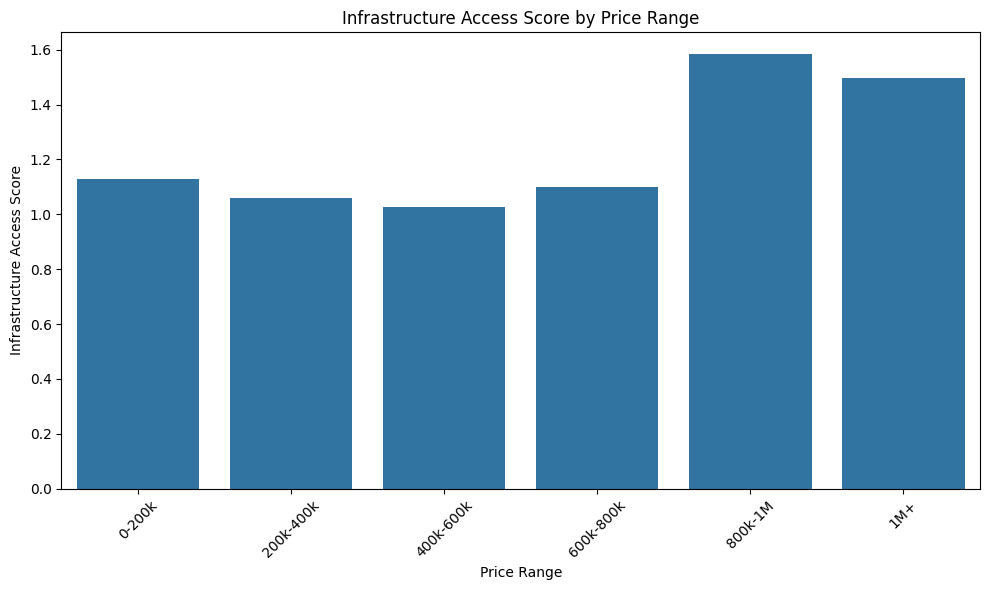

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=combined_df, x='Price_Range', y='Infra_Access_Score', ci=None)

plt.title('Infrastructure Access Score by Price Range')
plt.ylabel('Infrastructure Access Score')
plt.xlabel('Price Range')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/y2/k7fcyjtj0nq71zg3bv8k7jl00000gn/T/ipykernel_74174/315440003.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_df, x='Price_Range', y='Urban_Proximity_Score', ci=None)


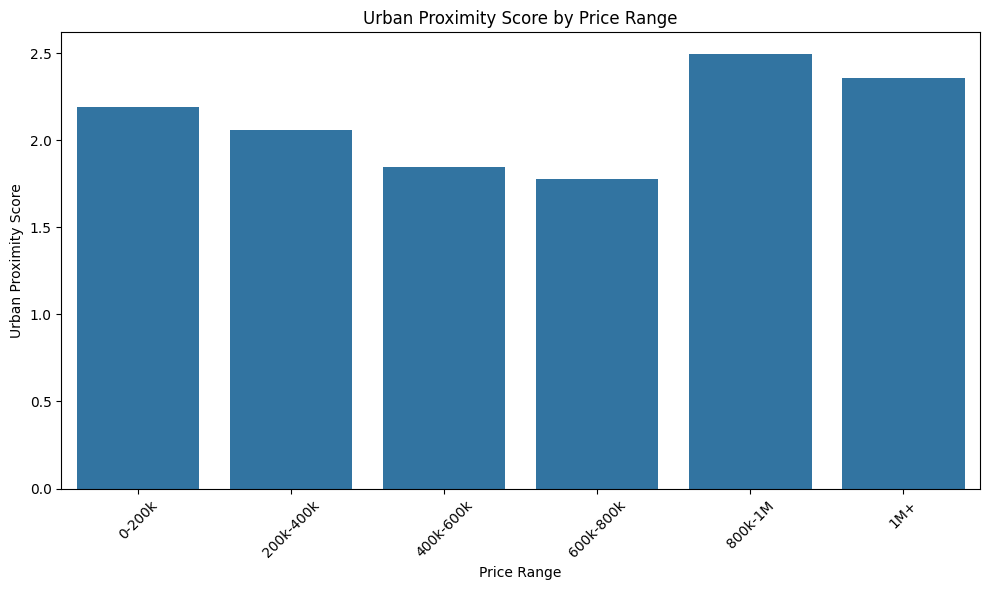

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=combined_df, x='Price_Range', y='Urban_Proximity_Score', ci=None)

plt.title('Urban Proximity Score by Price Range')
plt.ylabel('Urban Proximity Score')
plt.xlabel('Price Range')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/y2/k7fcyjtj0nq71zg3bv8k7jl00000gn/T/ipykernel_74174/2434690073.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Price_Range', y=col, data=combined_df, ax=axes[i], palette='viridis')
/var/folders/y2/k7fcyjtj0nq71zg3bv8k7jl00000gn/T/ipykernel_74174/2434690073.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Price_Range', y=col, data=combined_df, ax=axes[i], palette='viridis')
/var/folders/y2/k7fcyjtj0nq71zg3bv8k7jl00000gn/T/ipykernel_74174/2434690073.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Price_Range

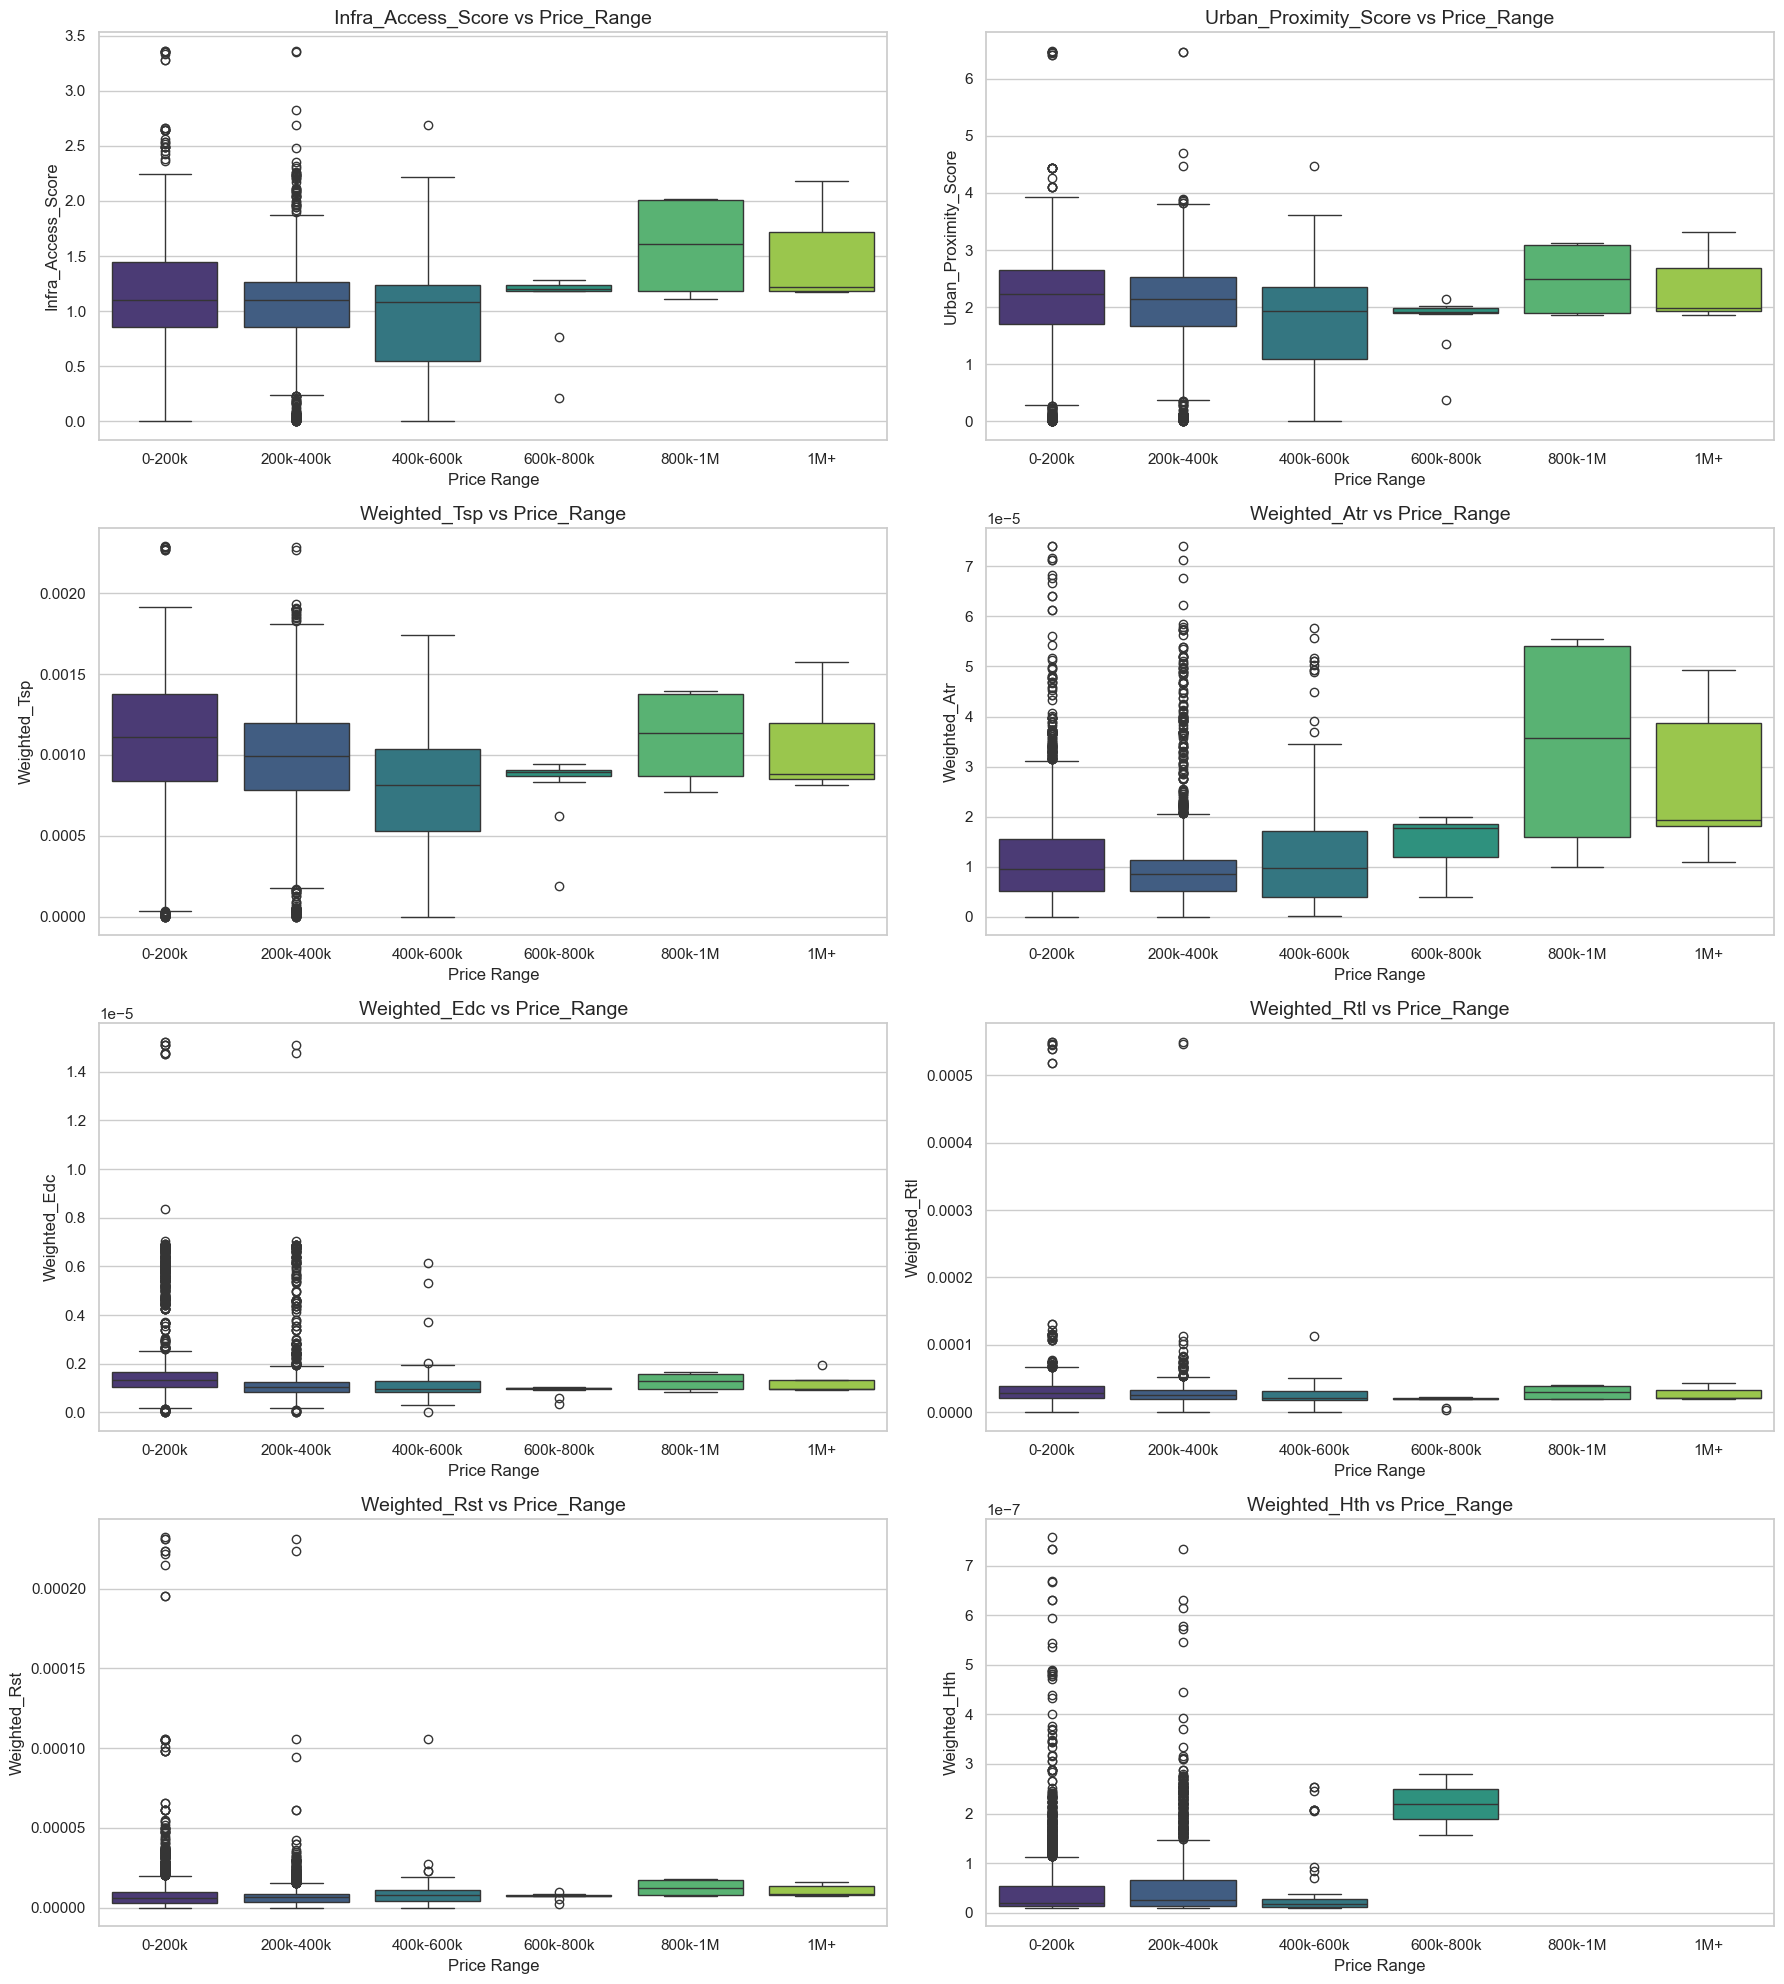

In [27]:
# Re-import necessary libraries and reload data (assumed to be in memory previously)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Set style
sns.set(style="whitegrid")

# List of scores to plot
score_cols = [
    'Infra_Access_Score', 
    'Urban_Proximity_Score', 
    'Weighted_Tsp', 
    'Weighted_Atr', 
    'Weighted_Edc', 
    'Weighted_Rtl', 
    'Weighted_Rst', 
    'Weighted_Hth'
]

# Create boxplots for each score vs Price_Range
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 20))
axes = axes.flatten()

for i, col in enumerate(score_cols):
    sns.boxplot(x='Price_Range', y=col, data=combined_df, ax=axes[i], palette='viridis')
    axes[i].set_title(f'{col} vs Price_Range', fontsize=14)
    axes[i].set_xlabel('Price Range')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()


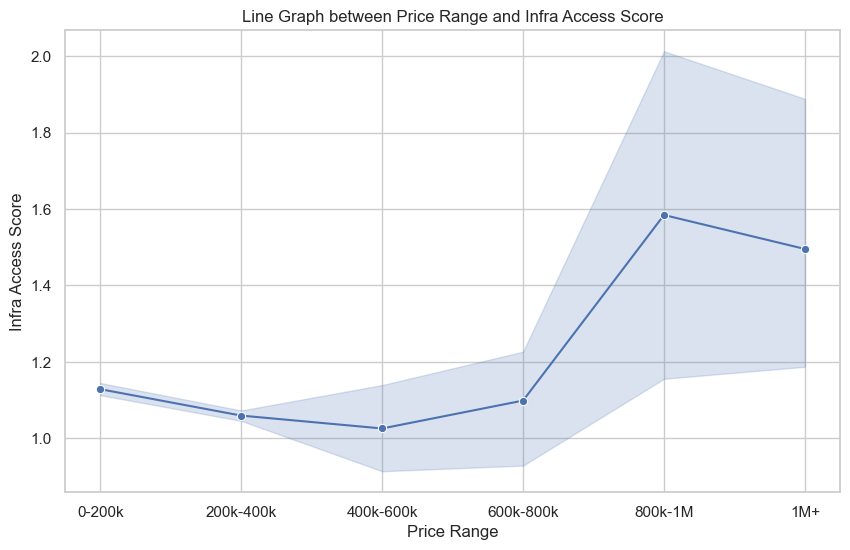

In [28]:

# Plotting the line graph
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_df, x='Price_Range', y='Infra_Access_Score', marker='o')
plt.title('Line Graph between Price Range and Infra Access Score')
plt.xlabel('Price Range')
plt.ylabel('Infra Access Score')
# Restore labels for x-axis
plt.show()


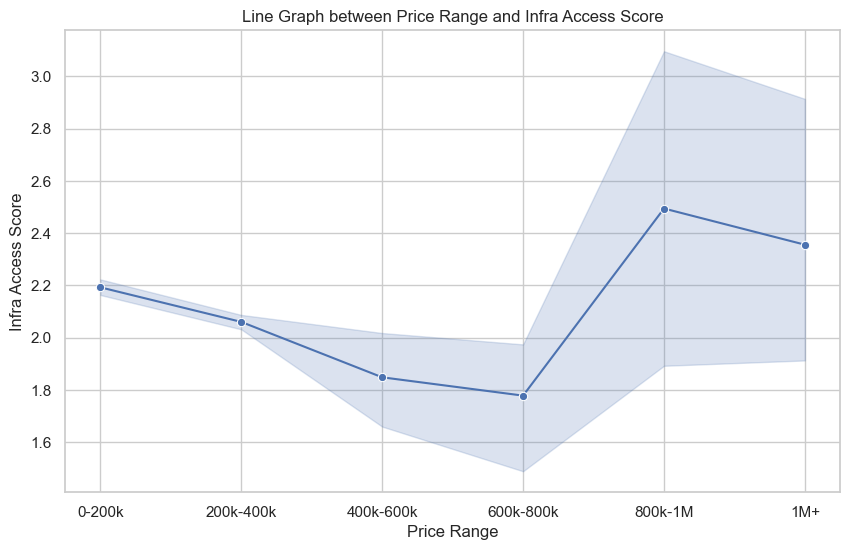

In [29]:
# Plotting the line graph
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_df, x='Price_Range', y='Urban_Proximity_Score', marker='o')
plt.title('Line Graph between Price Range and Infra Access Score')
plt.xlabel('Price Range')
plt.ylabel('Infra Access Score')
# Restore labels for x-axis
plt.show()

In [30]:
combined_df['nbhd'].unique()

array([  40,  240,  440,  360,  380,  820,  480,  520,  560,  600,  660,
        800,  780,   50,  700,  960,  900, 1200,  980, 1020, 1040, 1400,
       1380, 1140, 1160, 1220, 1340, 1440, 1150, 1480, 1460, 1470, 1490,
       1560, 1680, 1500, 1620, 2100, 2040, 1940, 1830, 1820, 1840, 1740,
       2840, 2860, 2820, 2900, 3060, 3160, 3320, 3150, 2880, 2850, 2870,
       2960, 2950, 1780, 1850, 2080, 2120, 2140, 1980, 1870, 1860, 2510,
       2540, 2600, 2580, 2520, 2380, 2400, 2420, 3000, 2970, 2910, 2890,
       2920, 3240, 3190, 3170, 3040, 2300, 2610, 2660, 2180, 2160, 2680,
       2700, 2720, 2710, 2760, 4060, 4020, 4040, 4050, 4000, 4100, 4120,
       4510, 4240, 4280, 4260, 4320, 4160, 4910, 4540, 4500, 4560, 4610,
       4600, 4580, 4180, 4400, 4350, 4340, 4310, 4380, 4420, 4410, 4360,
       4520, 4620, 4700, 4425, 4330, 4430, 4660, 4740, 4720, 4800, 4780,
       4840, 4860, 4920])

/var/folders/y2/k7fcyjtj0nq71zg3bv8k7jl00000gn/T/ipykernel_74174/568141089.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


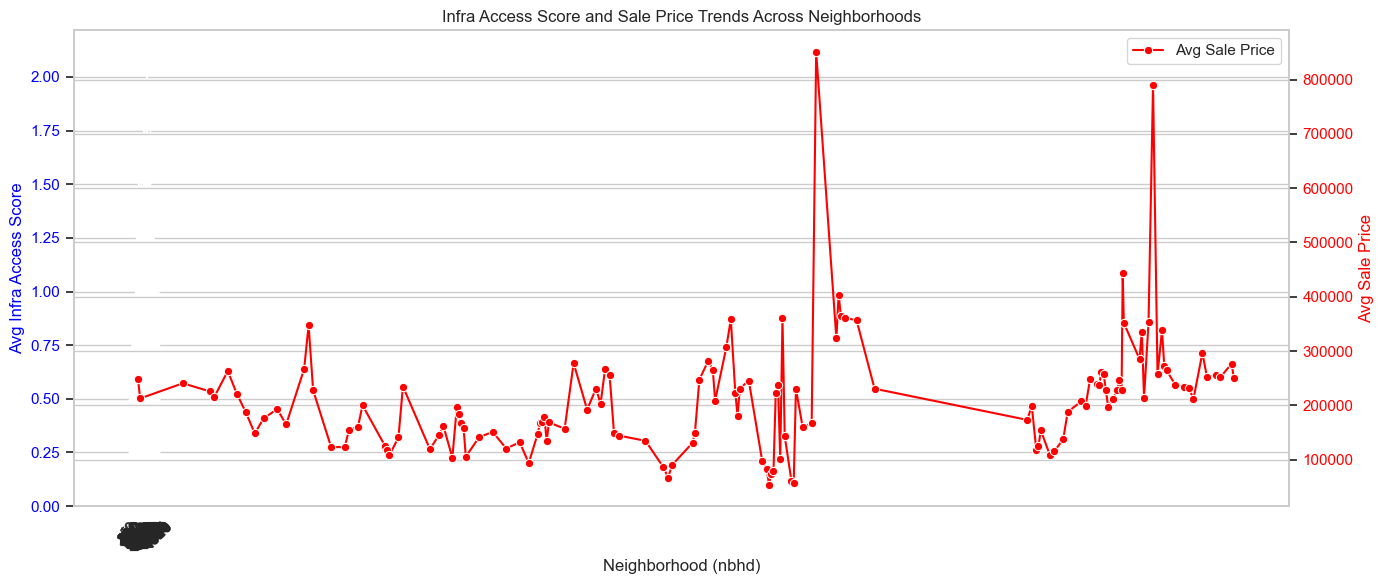

In [31]:
# Group by nbhd to get average scores
nbhd_avg = combined_df.groupby('nbhd')[['Infra_Access_Score', 'Sale_price']].mean().reset_index()

# Create dual-axis plot
fig, ax1 = plt.subplots(figsize=(14, 6))

# Bar plot for Infra_Access_Score
sns.barplot(data=nbhd_avg, x='nbhd', y='Infra_Access_Score', ax=ax1, color='skyblue')
ax1.set_ylabel('Avg Infra Access Score', color='blue')
ax1.set_xlabel('Neighborhood (nbhd)')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Line plot for Sale_price
ax2 = ax1.twinx()
sns.lineplot(data=nbhd_avg, x='nbhd', y='Sale_price', ax=ax2, color='red', marker='o', label='Avg Sale Price')
ax2.set_ylabel('Avg Sale Price', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Titles and layout
plt.title('Infra Access Score and Sale Price Trends Across Neighborhoods')
fig.tight_layout()
plt.show()


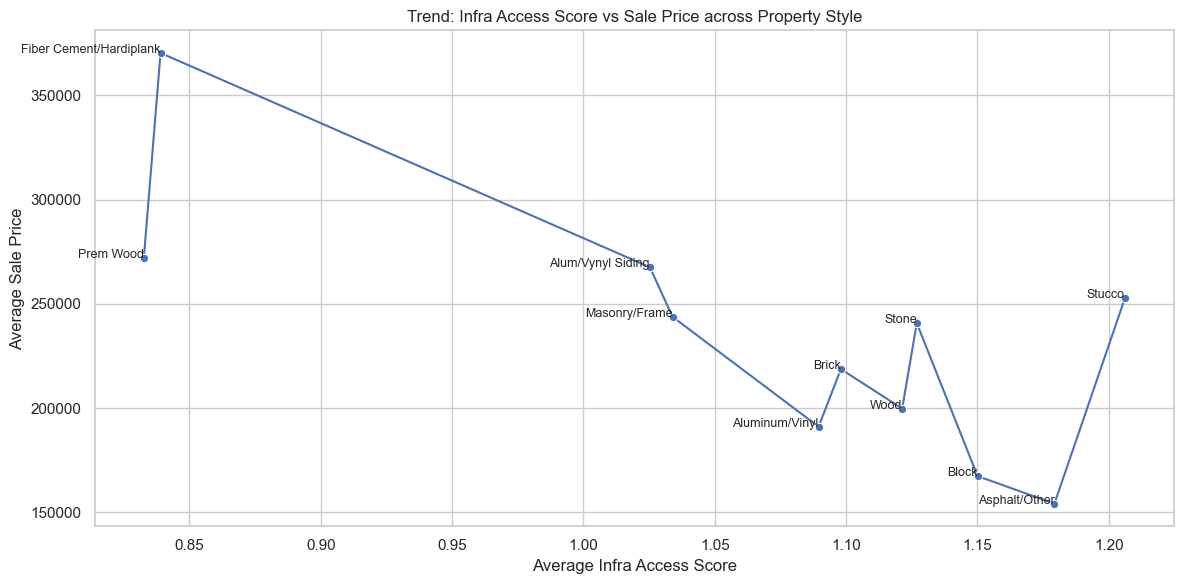

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Style and calculate average Infra_Access_Score and Sale_price
style_avg = combined_df.groupby('Extwall')[['Infra_Access_Score', 'Sale_price']].mean().reset_index()

# Sort by Infra_Access_Score for clear trend
style_avg = style_avg.sort_values(by='Infra_Access_Score')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=style_avg, x='Infra_Access_Score', y='Sale_price', marker='o', hue=None)
for i, row in style_avg.iterrows():
    plt.text(row['Infra_Access_Score'], row['Sale_price'], row['Extwall'], fontsize=9, ha='right')

plt.title('Trend: Infra Access Score vs Sale Price across Property Style')
plt.xlabel('Average Infra Access Score')
plt.ylabel('Average Sale Price')
plt.grid(True)
plt.tight_layout()
plt.show()


In [33]:
combined_df.shape

(6005, 49)

In [34]:
combined_df = combined_df.drop(columns=['CondoProject'])

In [35]:
print(combined_df.isnull().sum().sort_values(ascending=False))

Weighted_Hth             1441
Hth_Density              1441
Atr_Density                26
Weighted_Atr               26
Weighted_Rst               20
Rst_Density                20
Weighted_Rtl               13
Rtl_Density                13
Edc_Density                11
Weighted_Edc               11
Tsp_Density                 9
Weighted_Tsp                9
Urban_Proximity_Score       1
Latitude                    0
Infra_Access_Score          0
Price_Range                 0
Sale_price                  0
Sale_date                   0
Lotsize                     0
Hbath                       0
Fbath                       0
Bdrms                       0
Units                       0
FinishedSqft                0
Address                     0
Year_Built                  0
RstNum                      0
Longitude                   0
TspNum                      0
TspDst                      0
AtrNum                      0
AtrDst                      0
EdcNum                      0
EdcDst    

In [36]:
combined_df = combined_df.dropna()

In [37]:
print(combined_df.isnull().sum().sort_values(ascending=False))

Address                  0
Latitude                 0
Units                    0
Bdrms                    0
Fbath                    0
Hbath                    0
Lotsize                  0
Sale_date                0
Sale_price               0
Price_Range              0
Tsp_Density              0
Atr_Density              0
Edc_Density              0
Rtl_Density              0
Rst_Density              0
Hth_Density              0
Weighted_Tsp             0
Weighted_Atr             0
Weighted_Edc             0
Weighted_Rtl             0
Weighted_Rst             0
Weighted_Hth             0
Infra_Access_Score       0
FinishedSqft             0
Rooms                    0
Year_Built               0
RstNum                   0
Longitude                0
TspNum                   0
TspDst                   0
AtrNum                   0
AtrDst                   0
EdcNum                   0
EdcDst                   0
HthNum                   0
HthDst                   0
RstDst                   0
S

In [38]:
combined_df['Sale_date'] = pd.to_datetime(combined_df['Sale_date'], errors='coerce')

In [39]:
combined_df['Sale_Year'] = combined_df['Sale_date'].dt.year
combined_df['Sale_Month'] = combined_df['Sale_date'].dt.month
combined_df['Sale_Quarter'] = combined_df['Sale_date'].dt.quarter

In [40]:
print("PropType:", combined_df['PropType'].unique())
print("Style:", combined_df['Style'].unique())
print("Extwall:", combined_df['Extwall'].unique())

PropType: ['Residential']
Style: ['Ranch' 'Colonial' 'Duplex N/S' 'Townhouse' 'Tudor' 'Cape Cod'
 'Split Level' 'Bi-Level' 'Cottage' 'Res O/S A & 1/2' 'Duplex O/S'
 'Milwaukee Bungalow' 'Triplex' 'Res O/S 2sty +' 'Dplx Bungalow'
 'Res O/S 1 Story' 'Contemporary' 'Multiple Residential Bldgs' 'Mansion'
 'Duplex-Cottage']
Extwall: ['Aluminum/Vinyl' 'Fiber Cement/Hardiplank' 'Asphalt/Other' 'Wood' 'Brick'
 'Stone' 'Masonry/Frame' 'Prem Wood' 'Stucco' 'Alum/Vynyl Siding' 'Block']


In [41]:
#Encoding Clean Version
combined_df = combined_df.drop(columns=['PropType'])

combined_df = pd.get_dummies(combined_df, columns=['Style', 'Extwall'], drop_first=True)

In [42]:
#Standardizing/ Normalizing the numerical values using Standard Scaler
from sklearn.preprocessing import StandardScaler

numeric_cols = combined_df.select_dtypes(include=['float64', 'int64']).columns.drop('Sale_price')

scaler = StandardScaler()

In [43]:
numeric_cols

Index(['Latitude', 'Longitude', 'TspNum', 'TspDst', 'AtrNum', 'AtrDst',
       'EdcNum', 'EdcDst', 'HthNum', 'HthDst', 'RstNum', 'RstDst', 'RtlNum',
       'RtlDst', 'PropertyID', 'taxkey', 'District', 'nbhd', 'Stories',
       'Year_Built', 'Rooms', 'FinishedSqft', 'Units', 'Bdrms', 'Fbath',
       'Hbath', 'Lotsize', 'Tsp_Density', 'Atr_Density', 'Edc_Density',
       'Rtl_Density', 'Rst_Density', 'Hth_Density', 'Weighted_Tsp',
       'Weighted_Atr', 'Weighted_Edc', 'Weighted_Rtl', 'Weighted_Rst',
       'Weighted_Hth', 'Infra_Access_Score', 'Urban_Proximity_Score'],
      dtype='object')

In [44]:
combined_df[numeric_cols] = scaler.fit_transform(combined_df[numeric_cols])

In [45]:
#Dropping the keys from Df
combined_df = combined_df.drop(columns=['Address', 'PropertyID', 'taxkey', 'Sale_date', "Price_Range"])

In [46]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4538 entries, 0 to 6004
Data columns (total 72 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Latitude                          4538 non-null   float64
 1   Longitude                         4538 non-null   float64
 2   TspNum                            4538 non-null   float64
 3   TspDst                            4538 non-null   float64
 4   AtrNum                            4538 non-null   float64
 5   AtrDst                            4538 non-null   float64
 6   EdcNum                            4538 non-null   float64
 7   EdcDst                            4538 non-null   float64
 8   HthNum                            4538 non-null   float64
 9   HthDst                            4538 non-null   float64
 10  RstNum                            4538 non-null   float64
 11  RstDst                            4538 non-null   float64
 12  RtlNum     

In [47]:
#Split the data
from sklearn.model_selection import train_test_split

# Drop columns we don't want as features
X = combined_df.drop(columns=['Sale_price'])
y = combined_df['Sale_price']

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and fit the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression MSE: {mse:.2f}")
print(f"Linear Regression R² Score: {r2:.4f}")


Linear Regression MSE: 2580889438.63
Linear Regression R² Score: 0.5984


/var/folders/y2/k7fcyjtj0nq71zg3bv8k7jl00000gn/T/ipykernel_74174/2083994230.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_coef_df, palette='coolwarm')


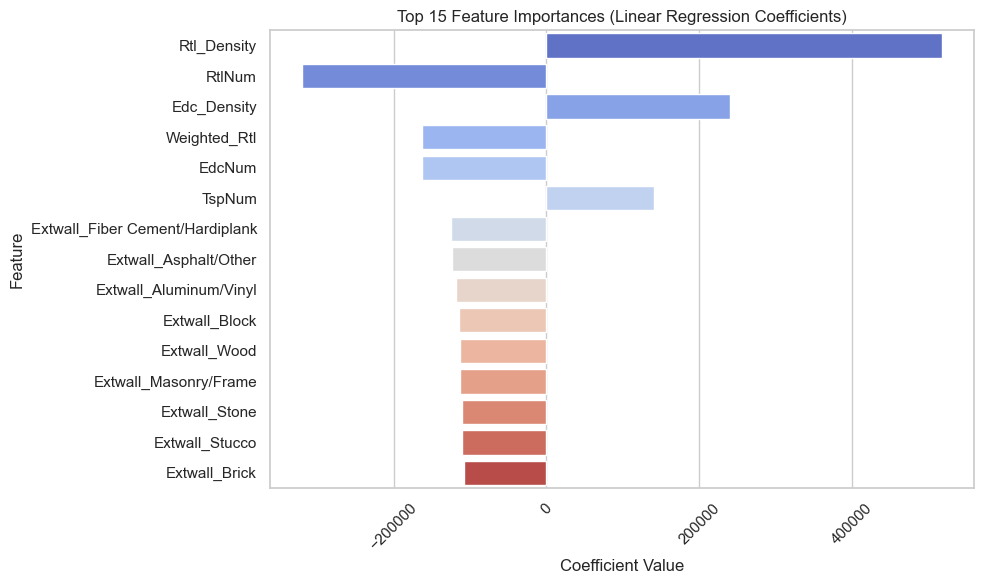

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get coefficients
coefficients = lr_model.coef_
features = X.columns

# Create DataFrame
coef_df = pd.DataFrame({'Feature': features, 'Importance': coefficients})
coef_df = coef_df.sort_values(by='Importance', key=abs, ascending=False)  # sort by absolute importance

top_coef_df = coef_df.reindex(coef_df['Importance'].abs().sort_values(ascending=False).index).head(15)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_coef_df, palette='coolwarm')
plt.title('Top 15 Feature Importances (Linear Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


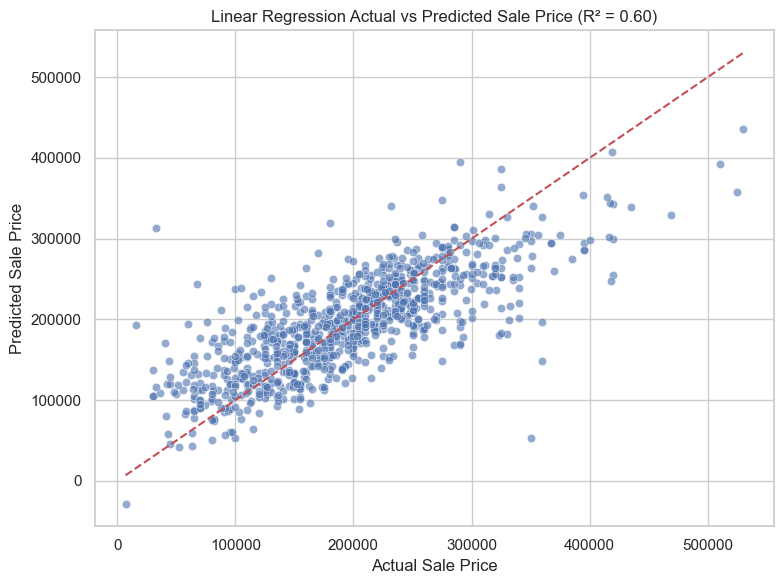

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Predict using your trained model
y_pred = lr_model.predict(X_test)

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # 45-degree line
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title(f'Linear Regression Actual vs Predicted Sale Price (R² = {r2_score(y_test, y_pred):.2f})')
plt.tight_layout()
plt.show()


In [51]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

print(f"Random Forest MSE: {rf_mse:.2f}")
print(f"Random Forest R² Score: {rf_r2:.4f}")


Random Forest MSE: 1629526018.81
Random Forest R² Score: 0.7465


/var/folders/y2/k7fcyjtj0nq71zg3bv8k7jl00000gn/T/ipykernel_74174/1223824207.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_importance_df, palette='crest')


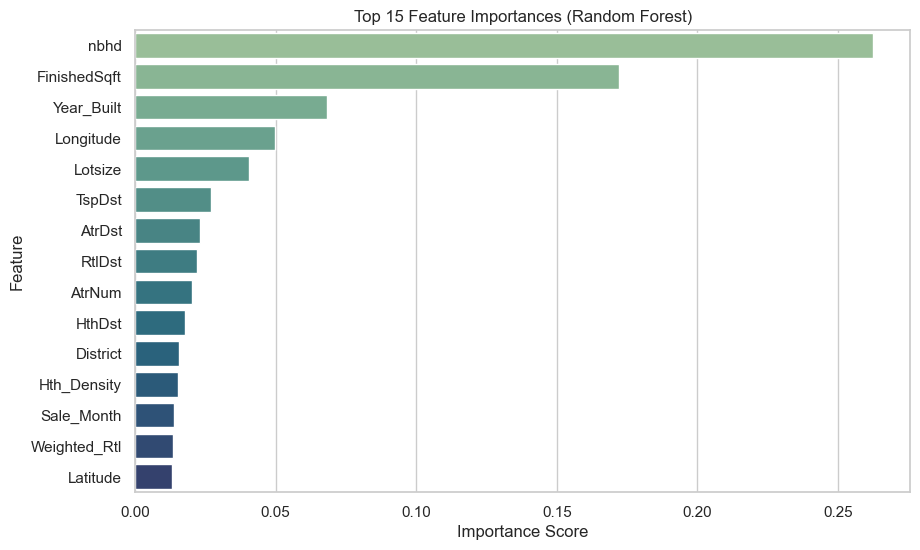

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importances
importances = rf_model.feature_importances_
features = X.columns

# Create DataFrame
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
top_importance_df = importance_df.sort_values(by='Importance', ascending=False).head(15)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_importance_df, palette='crest')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


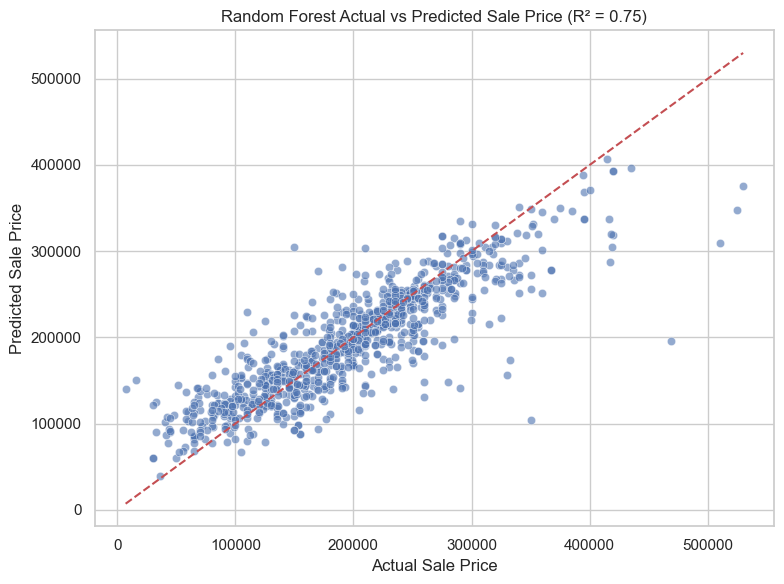

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Predict using your trained model
y_pred = rf_model.predict(X_test)

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # 45-degree line
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title(f'Random Forest Actual vs Predicted Sale Price (R² = {r2_score(y_test, y_pred):.2f})')
plt.tight_layout()
plt.show()


In [54]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

xgb_mse = mean_squared_error(y_test, xgb_preds)
xgb_r2 = r2_score(y_test, xgb_preds)

print(f"XGBoost MSE: {xgb_mse:.2f}")
print(f"XGBoost R² Score: {xgb_r2:.4f}")


XGBoost MSE: 1472020459.67
XGBoost R² Score: 0.7710


<Figure size 1200x600 with 0 Axes>

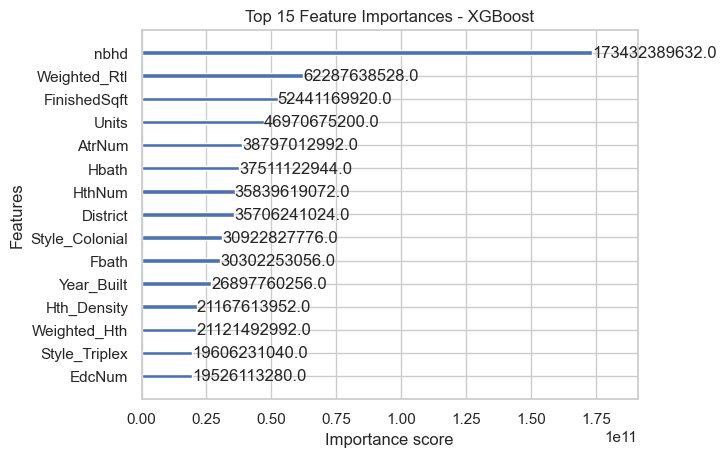

In [55]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plt.figure(figsize=(12, 6))
plot_importance(xgb_model, max_num_features=15, importance_type='gain')
plt.title("Top 15 Feature Importances - XGBoost")
plt.show()


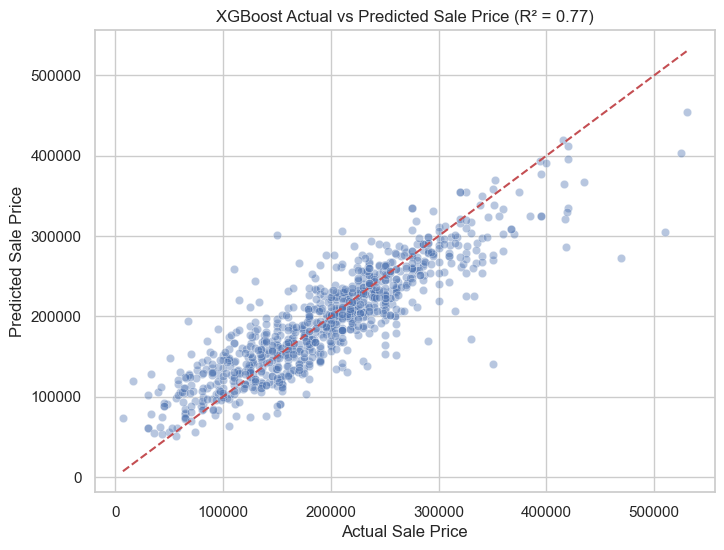

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = xgb_model.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=xgb_preds, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title(f'XGBoost Actual vs Predicted Sale Price (R² = {r2_score(y_test, y_pred):.2f})')
plt.show()

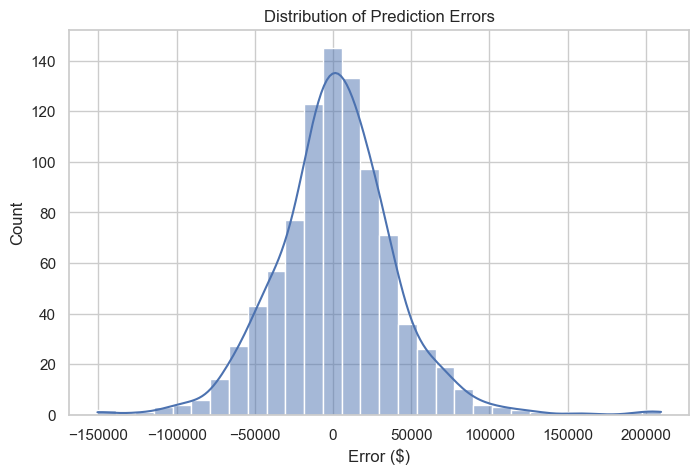

In [57]:
errors = y_test - xgb_preds

plt.figure(figsize=(8, 5))
sns.histplot(errors, kde=True, bins=30)
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error ($)")
plt.show()


In [58]:
#Hyper Tunning and using RandomizedSearchCV for that on XGBoost Model
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define model
xgb = XGBRegressor(random_state=42)

# Define hyperparameter space
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3)
}

# Setup random search
random_search = RandomizedSearchCV(
    xgb, param_distributions=param_dist,
    n_iter=30,  # number of combinations to try
    scoring='neg_mean_squared_error',
    cv=3,  # 3-fold CV inside tuning
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit on training data
random_search.fit(X_train, y_train)

# Results
best_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Evaluate on test data
from sklearn.metrics import mean_squared_error, r2_score
y_pred = best_model.predict(X_test)
print("Tuned XGBoost MSE:", mean_squared_error(y_test, y_pred))
print("Tuned XGBoost R² Score:", r2_score(y_test, y_pred))


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Parameters: {'colsample_bytree': np.float64(0.8349262400109296), 'learning_rate': np.float64(0.08903004720036288), 'max_depth': 6, 'n_estimators': 369, 'subsample': np.float64(0.9181815987569262)}
Tuned XGBoost MSE: 1371674254.7358553
Tuned XGBoost R² Score: 0.7865763152352871


In [62]:
#Best Model
best_xgb = best_model

/var/folders/y2/k7fcyjtj0nq71zg3bv8k7jl00000gn/T/ipykernel_74174/2801495469.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette='rocket')


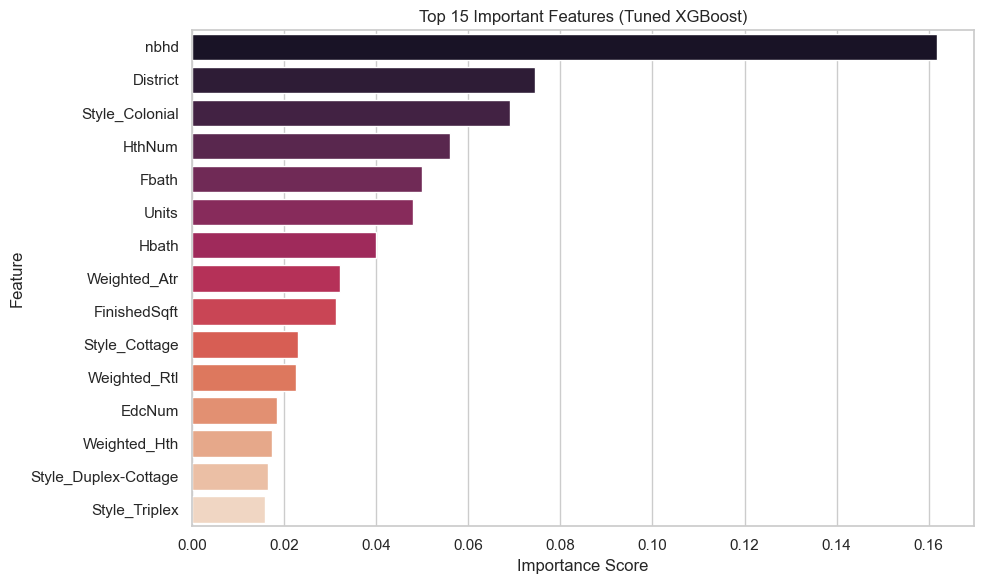

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = best_xgb.feature_importances_
features = X.columns

# Create dataframe
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
top_features = importance_df.sort_values(by='Importance', ascending=False).head(15)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='rocket')
plt.title('Top 15 Important Features (Tuned XGBoost)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


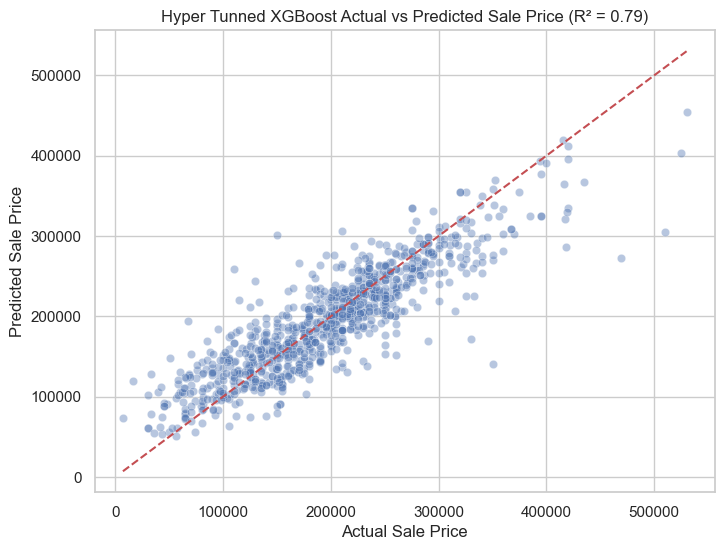

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = best_model.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=xgb_preds, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title(f'Hyper Tunned XGBoost Actual vs Predicted Sale Price (R² = {r2_score(y_test, y_pred):.2f})')
plt.show()

In [65]:
#Hyper Tunning using GridSearchCV on XG Boost
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid = {
    'n_estimators': [200, 225, 235, 250, 275],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.15, 0.2, 0.25],
    'subsample': [0.6, 0.7, 0.8],
    'colsample_bytree': [0.65, 0.7, 0.75]
}

xgb_model = XGBRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 405 candidates, totalling 2025 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.65, 0.7, 0.75],
                         'learning_rate': [0.15, 0.2, 0.25],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [200, 225, 235, 250, 275],
                         'subsample': [0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error', verbose=1)

In [66]:
best_xgb = grid_search.best_estimator_

y_pred = best_xgb.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print(f"Tuned XGBoost MSE: {mse}")
print(f"Tuned XGBoost R² Score: {r2}")


Best Parameters: {'colsample_bytree': 0.65, 'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 275, 'subsample': 0.6}
Tuned XGBoost MSE: 1570091773.4654493
Tuned XGBoost R² Score: 0.7557038265063243


In [68]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 5053 to 929
Data columns (total 71 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Latitude                          3630 non-null   float64
 1   Longitude                         3630 non-null   float64
 2   TspNum                            3630 non-null   float64
 3   TspDst                            3630 non-null   float64
 4   AtrNum                            3630 non-null   float64
 5   AtrDst                            3630 non-null   float64
 6   EdcNum                            3630 non-null   float64
 7   EdcDst                            3630 non-null   float64
 8   HthNum                            3630 non-null   float64
 9   HthDst                            3630 non-null   float64
 10  RstNum                            3630 non-null   float64
 11  RstDst                            3630 non-null   float64
 12  RtlNum   

In [59]:
#Stop Here

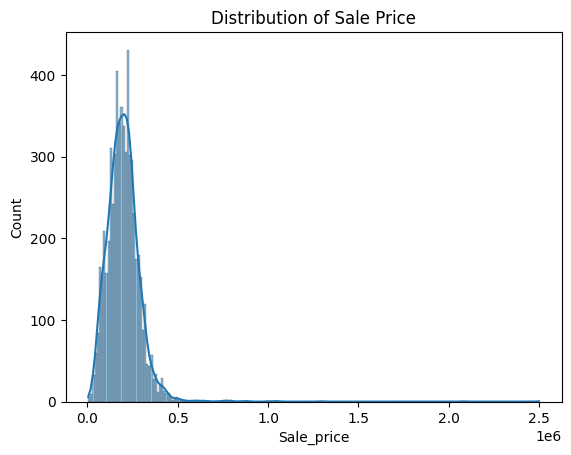

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(combined_df["Sale_price"], kde=True)
plt.title("Distribution of Sale Price")
plt.show()

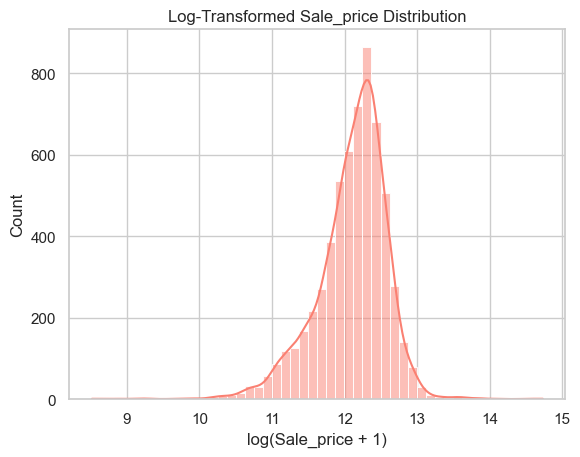

In [69]:
#Log Transformed Target Variable
import numpy as np

# Apply log transformation to Sale_price (np.log1p handles 0 values as well)
combined_df['Sale_price'] = np.log1p(combined_df['Sale_price'])

# Verify transformation by checking the distribution again
sns.histplot(combined_df['Sale_price'], bins=50, kde=True, color='salmon')
plt.title('Log-Transformed Sale_price Distribution')
plt.xlabel('log(Sale_price + 1)')
plt.show()


In [72]:
#Spliting the data to Train and Test
from sklearn.model_selection import train_test_split

# Define features and target
X = combined_df.drop(columns=['Sale_price'])  # Exclude non-numeric columns
y = combined_df['Sale_price']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [73]:
from xgboost import XGBRegressor

# Initialize the XGBoost model
xg_reg = XGBRegressor(
    colsample_bytree=0.65, 
    learning_rate=0.15, 
    max_depth=5, 
    n_estimators=275, 
    subsample=0.7, 
    random_state=42
)

# Train the model
xg_reg.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.65, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.15, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=275,
             n_jobs=None, num_parallel_tree=None, ...)

In [74]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = xg_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"XGBoost MSE: {mse}")
print(f"XGBoost R² Score: {r2}")


XGBoost MSE: 0.052902286433311276
XGBoost R² Score: 0.7475931111018097


In [75]:
#Hyper Tunning using GridSearchCV on XGBoost Model
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Initialize the XGBoost model
xg_reg = XGBRegressor(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 150, 200, 275],        # Number of boosting rounds
    'learning_rate': [0.05, 0.1, 0.15, 0.2],     # Step size at each iteration
    'max_depth': [3, 5, 7],                       # Maximum depth of a tree
    'subsample': [0.6, 0.7, 0.8, 0.9],            # Fraction of samples used for fitting trees
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],    # Fraction of features used for fitting trees
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xg_reg, 
    param_grid=param_grid, 
    cv=3,                # Number of cross-validation folds
    scoring='r2',        # Metric for scoring (R² score)
    verbose=2,           # To show detailed logs
    n_jobs=-1            # Use all available CPU cores
)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best R² Score from GridSearchCV: {best_score}")


Fitting 3 folds for each of 768 candidates, totalling 2304 fits
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, n_estimators=150, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, n_estimators=275, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, n_estimators=275, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=5, n_estimators=150, subsample=0.6; total time=   0.8s
[CV] END

In [76]:
# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_best = best_model.predict(X_test)

# Evaluate the model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Tuned XGBoost MSE: {mse_best}")
print(f"Tuned XGBoost R² Score: {r2_best}")


Tuned XGBoost MSE: 0.0503185534482557
Tuned XGBoost R² Score: 0.759920593493778

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=150, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=150, subsample=0.9; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=275, subsample=0.7; total time=   2.2s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=275, subsample=0.9; total time=   2.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=150, subsample=0.7; total time

In [77]:
#Hyperparameter Tunning using RandomizedSearchCV on XGboost Model
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the hyperparameters grid
param_grid = {
    'learning_rate': np.arange(0.01, 0.3, 0.01),
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': np.arange(0.6, 1.0, 0.05),
    'colsample_bytree': np.arange(0.6, 1.0, 0.05)
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, 
                                   n_iter=50, scoring='neg_mean_squared_error', cv=3, 
                                   verbose=2, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Best Parameters and Model Performance
best_params = random_search.best_params_
print(f"Best Parameters: {best_params}")

# Evaluate the tuned model
tuned_xgb = random_search.best_estimator_
y_pred_tuned = tuned_xgb.predict(X_test)

# Calculate MSE and R² Score
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred_tuned)
r2 = r2_score(y_test, y_pred_tuned)

print(f"Tuned XGBoost MSE: {mse}")
print(f"Tuned XGBoost R² Score: {r2}")


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'subsample': np.float64(0.7500000000000001), 'n_estimators': 400, 'max_depth': 4, 'learning_rate': np.float64(0.07), 'colsample_bytree': np.float64(0.6)}
Tuned XGBoost MSE: 0.0508752281396282
Tuned XGBoost R² Score: 0.7572645924690432


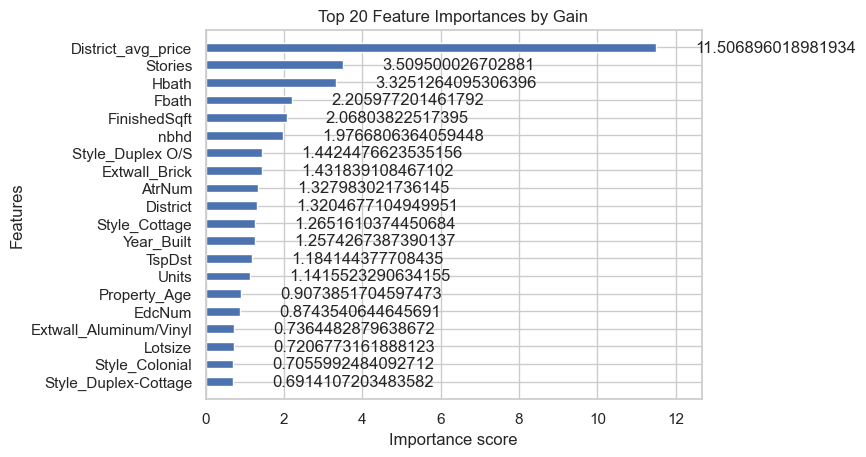

In [111]:
import matplotlib.pyplot as plt
import xgboost as xgb
import pandas as pd

# Assuming xgb_model is your trained XGBoost model
xgb.plot_importance(tuned_xgb, importance_type='gain', max_num_features=20, height=0.5)
plt.title('Top 20 Feature Importances by Gain')
plt.show()

# Optional: get importance scores into a DataFrame
importance_df = pd.DataFrame({
    'Feature': tuned_xgb.get_booster().feature_names,
    'Importance': tuned_xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)


In [112]:
low_importance = importance_df[importance_df['Importance'] < 0.001]['Feature'].tolist()
X_train_reduced = X_train.drop(columns=low_importance)
X_test_reduced = X_test.drop(columns=low_importance)

In [114]:
X_train_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4804 entries, 2673 to 860
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Latitude                          4804 non-null   float64
 1   Longitude                         4804 non-null   float64
 2   TspNum                            4804 non-null   float64
 3   TspDst                            4804 non-null   float64
 4   AtrNum                            4804 non-null   float64
 5   AtrDst                            4804 non-null   float64
 6   EdcNum                            4804 non-null   float64
 7   EdcDst                            4804 non-null   float64
 8   HthNum                            4804 non-null   float64
 9   HthDst                            4804 non-null   float64
 10  RstNum                            4804 non-null   float64
 11  RstDst                            4804 non-null   float64
 12  RtlDst   

In [113]:
import seaborn as sns

corr_matrix = X_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

print("Highly correlated features to drop:", to_drop)

# Drop from dataset
X_train_reduced = X_train_reduced.drop(columns=to_drop)
X_test_reduced = X_test_reduced.drop(columns=to_drop)


Highly correlated features to drop: ['RtlNum', 'Bdrms', 'Sale_Quarter', 'Property_Age']


In [115]:
# Examples of useful interactions:
X_train_reduced['Sqft_Lot_Interaction'] = X_train_reduced['FinishedSqft'] * X_train_reduced['Lotsize']
X_train_reduced['Bath_per_Room'] = (X_train_reduced['Fbath'] + X_train_reduced['Hbath']) / (X_train_reduced['Rooms'] + 1)
X_train_reduced['Rooms_Stories'] = X_train_reduced['Rooms'] * X_train_reduced['Stories']


In [116]:
from sklearn.preprocessing import PolynomialFeatures

# Only apply on a few numerical features to avoid dimensionality explosion
poly_features = ['FinishedSqft', 'Rooms', 'Lotsize']
poly = PolynomialFeatures(degree=2, include_bias=False)

poly_train = pd.DataFrame(poly.fit_transform(X_train_reduced[poly_features]),
                          columns=poly.get_feature_names_out(poly_features),
                          index=X_train_reduced.index)

# Combine with original features
X_train_reduced = pd.concat([X_train_reduced, poly_train], axis=1)


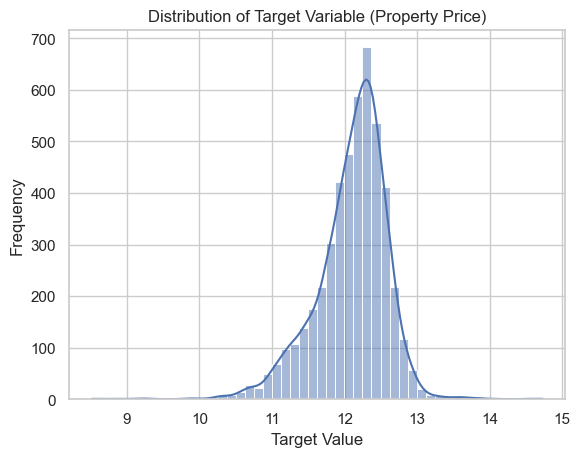

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(y_train, bins=50, kde=True)
plt.title("Distribution of Target Variable (Property Price)")
plt.xlabel("Target Value")
plt.ylabel("Frequency")
plt.show()


In [118]:
import numpy as np

# Set clipping bounds
lower_bound = np.percentile(y_train, 1)
upper_bound = np.percentile(y_train, 99)

# Apply clipping
y_train_clipped = np.clip(y_train, lower_bound, upper_bound)


In [119]:
y_train_log = np.log1p(y_train)


In [120]:
# Retrain with clipped target
tuned_xgb.fit(X_train_reduced, y_train_clipped)

# Predict (note: don't clip y_test)
y_pred = best_model.predict(X_test)

# Evaluate
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"🔁 Retrained Model MSE: {mse}")
print(f"🔁 Retrained Model R² Score: {r2}")


AttributeError: 'DataFrame' object has no attribute 'dtype'